In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]

In [3]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
import sqlite3

# Create the checkpointer properly
conn = sqlite3.connect(":memory:", check_same_thread=False)
memory = SqliteSaver(conn)


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

search_tool = TavilySearchResults(max_results=2)
tools = [search_tool]
llm = ChatOpenAI()
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

/var/folders/wt/k9xk77m14_scry8y3ldyfjr00000gn/T/ipykernel_96444/2838473929.py:22: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search_tool = TavilySearchResults(max_results=2)


In [4]:
graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

In [5]:
graph = graph_builder.compile(
    checkpointer=memory,
    interrupt_before=["tools"]
)

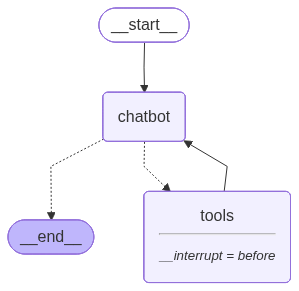

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [7]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
initial_message = {"messages": HumanMessage(content="Hi I am Suman")}

graph.invoke(initial_message, config=config)

{'messages': [HumanMessage(content='Hi I am Suman', additional_kwargs={}, response_metadata={}, id='59296cf4-a43c-4665-8f4d-964cef8f8d11'),
  AIMessage(content='Hello Suman! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 86, 'total_tokens': 98, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS61mIbPM0wSaRNPHGBPJilAflKY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7e05afda-b226-45ab-aa5c-e0503127035c-0', usage_metadata={'input_tokens': 86, 'output_tokens': 12, 'total_tokens': 98, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [8]:
config = {"configurable": {"thread_id": "100"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Sorry, did I already introduce myself?', additional_kwargs={}, response_metadata={}, id='90fc239e-0c31-410c-83a5-24662d0e53ca'),
  AIMessage(content="No, you haven't introduced yourself yet. If you'd like to share some information about yourself, feel free to do so!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 89, 'total_tokens': 116, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS6FNTprCVJL1tsDjCoRmhEYfbo7', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--64b3d6d0-a7fa-4c76-9096-3f8155688339-0', usage_metadata={'input_tokens': 89, 'output_tokens': 27, 'total_tokens': 116, 'input_token_details': {'audio': 0, 'ca

In [9]:
config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hi I am Suman', additional_kwargs={}, response_metadata={}, id='59296cf4-a43c-4665-8f4d-964cef8f8d11'),
  AIMessage(content='Hello Suman! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 86, 'total_tokens': 98, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS61mIbPM0wSaRNPHGBPJilAflKY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7e05afda-b226-45ab-aa5c-e0503127035c-0', usage_metadata={'input_tokens': 86, 'output_tokens': 12, 'total_tokens': 98, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='Sorry, d

In [10]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="How is the weather in Los Angeles?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hi I am Suman', additional_kwargs={}, response_metadata={}, id='59296cf4-a43c-4665-8f4d-964cef8f8d11'),
  AIMessage(content='Hello Suman! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 86, 'total_tokens': 98, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS61mIbPM0wSaRNPHGBPJilAflKY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7e05afda-b226-45ab-aa5c-e0503127035c-0', usage_metadata={'input_tokens': 86, 'output_tokens': 12, 'total_tokens': 98, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='Sorry, d

In [11]:
snapshot = graph.get_state(config)
snapshot.next

('tools',)

In [12]:
graph.invoke(None, config=config)

{'messages': [HumanMessage(content='Hi I am Suman', additional_kwargs={}, response_metadata={}, id='59296cf4-a43c-4665-8f4d-964cef8f8d11'),
  AIMessage(content='Hello Suman! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 86, 'total_tokens': 98, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS61mIbPM0wSaRNPHGBPJilAflKY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7e05afda-b226-45ab-aa5c-e0503127035c-0', usage_metadata={'input_tokens': 86, 'output_tokens': 12, 'total_tokens': 98, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='Sorry, d

In [13]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "2"}}
input_message = HumanMessage(content="How is the weather in Los Angeles?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='How is the weather in Los Angeles?', additional_kwargs={}, response_metadata={}, id='77a6fe16-0f87-44f1-9759-be2c2c9de419'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5QLTDfDdOcNf5r3CbFin9uY0', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS7brjRl6WZOxCdFvisbUC6jGWZ0', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3ed82b59-a4be-433e-821d-c06c44f8ad25-0', tool_calls=[{'name': 'tavily_search_results_json', 

In [14]:
snapshot = graph.get_state(config)


In [17]:
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='How is the weather in Los Angeles?', additional_kwargs={}, response_metadata={}, id='77a6fe16-0f87-44f1-9759-be2c2c9de419'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5QLTDfDdOcNf5r3CbFin9uY0', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS7brjRl6WZOxCdFvisbUC6jGWZ0', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3ed82b59-a4be-433e-821d-c06c44f8ad25-0', tool_calls=[{'name': 'tavily_sea

In [22]:
existing_message = snapshot.values["messages"][-1]
existing_message

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5QLTDfDdOcNf5r3CbFin9uY0', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS7brjRl6WZOxCdFvisbUC6jGWZ0', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3ed82b59-a4be-433e-821d-c06c44f8ad25-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in Los Angeles'}, 'id': 'call_5QLTDfDdOcNf5r3CbFin9uY0', 'type': 'tool_call'}], usage_metadata={'input_tokens': 89, 'output_tokens': 21,

In [23]:
existing_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'weather in Los Angeles'},
  'id': 'call_5QLTDfDdOcNf5r3CbFin9uY0',
  'type': 'tool_call'}]

In [21]:
from langchain_core.messages import AIMessage, ToolMessage

answer = "It is only 5°C warm today!"
new_messages = [
    ToolMessage(content=answer, tool_call_id=existing_message.tool_calls[0]["id"]),
    AIMessage(content=answer),
]

In [24]:
new_messages[-1].pretty_print()


================================== Ai Message ==================================

It is only 5°C warm today!


In [26]:
graph.update_state(
    config,
    {"messages": new_messages},
)



{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0bc43d-0ce0-6b5e-8003-784c4443c8de'}}

In [32]:
graph.get_state(config).values

{'messages': [HumanMessage(content='How is the weather in Los Angeles?', additional_kwargs={}, response_metadata={}, id='77a6fe16-0f87-44f1-9759-be2c2c9de419'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5QLTDfDdOcNf5r3CbFin9uY0', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS7brjRl6WZOxCdFvisbUC6jGWZ0', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3ed82b59-a4be-433e-821d-c06c44f8ad25-0', tool_calls=[{'name': 'tavily_search_results_json', 

In [33]:
print(graph.get_state(config).values["messages"][-2:])

[ToolMessage(content='It is only 5°C warm today!', id='2545b0e6-48bc-4305-a66e-a555551f35c1', tool_call_id='call_5QLTDfDdOcNf5r3CbFin9uY0'), AIMessage(content='It is only 5°C warm today!', additional_kwargs={}, response_metadata={}, id='a09b18ee-3a92-4070-bf96-f650807dc5f5')]


In [34]:
config = {"configurable": {"thread_id": "2"}}
input_message = HumanMessage(content="How warm was it again?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='How is the weather in Los Angeles?', additional_kwargs={}, response_metadata={}, id='77a6fe16-0f87-44f1-9759-be2c2c9de419'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5QLTDfDdOcNf5r3CbFin9uY0', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CZS7brjRl6WZOxCdFvisbUC6jGWZ0', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3ed82b59-a4be-433e-821d-c06c44f8ad25-0', tool_calls=[{'name': 'tavily_search_results_json', 